# Data Analytics Project

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

plt.style.use('dark_background')

Step 1: Data preparation, cleansing and visualization.

Import dataset.

In [2]:
data = pd.read_csv('US_Accidents_Dec21_updated.csv')

 After we have successfully read the dataset, it is time to drop all useless columns in order to clean up our data. Effective data cleansing is a vital part of the data analysis process, ensuring that the dataset is accurate and up-to-date.
The columns that we have decided to drop are listed below:
- Nautical_Twilight, Astronomical_Twilight, Civil_Twilight (information similar to Sunrise_Sunset column),
- End_Time (it seems that the end time of every accident is approximately six hours later from the start time),
- Number (this column contains a large amount of null values),
- Description (the information given by this column is, usually, given by other columns as well)

In [3]:
data = data.drop(columns=['Nautical_Twilight','Astronomical_Twilight','Civil_Twilight','End_Time','Number','Description'])

Convert Start_time to datetime data type.

In [4]:
data.Start_Time = pd.to_datetime(data.Start_Time)

# Print first five rows of dataset
data.head()

,ID,Severity,Start_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Street,Side,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-1,3,2016-02-08 00:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Outerbelt E,R,...,False,False,False,False,False,False,False,False,False,Night
1,A-2,2,2016-02-08 05:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,I-70 E,R,...,False,False,False,False,False,False,False,False,False,Night
2,A-3,2,2016-02-08 06:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,I-75 S,R,...,True,False,False,False,False,False,False,False,False,Night
3,A-4,2,2016-02-08 06:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,I-77 N,R,...,False,False,False,False,False,False,False,False,False,Night
4,A-5,3,2016-02-08 07:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,I-75 S,R,...,False,False,False,False,False,False,False,False,False,Day


Dimensionality of dataset.

In [5]:
data.shape

(2845342, 41)

Understand the data (view datatypes, columns etc).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 41 columns):
 #   Column             Dtype         
---  ------             -----         
 0   ID                 object        
 1   Severity           int64         
 2   Start_Time         datetime64[ns]
 3   Start_Lat          float64       
 4   Start_Lng          float64       
 5   End_Lat            float64       
 6   End_Lng            float64       
 7   Distance(mi)       float64       
 8   Street             object        
 9   Side               object        
 10  City               object        
 11  County             object        
 12  State              object        
 13  Zipcode            object        
 14  Country            object        
 15  Timezone           object        
 16  Airport_Code       object        
 17  Weather_Timestamp  object        
 18  Temperature(F)     float64       
 19  Wind_Chill(F)      float64       
 20  Humidity(%)        float

Drop null values in order to clean the data even more.

In [7]:
# See how many null values are there in each column
data.isna().sum()

# Drop null values
data= data.dropna()

Dimensionality of dataset (for comparative purpose only, see code cell 5).

In [8]:
data.shape

(2207325, 41)

Cleaning up Weather_Condition column:

The Weather_Condition column has the highest correlation with the severity column. It also has a lot of unique values that don't appear often. As a result of the above, we decided to clean this feature up, to minimize the number of values that the Weather_Condition column has.

First round of clean up.

<AxesSubplot:ylabel='Weather_Condition'>

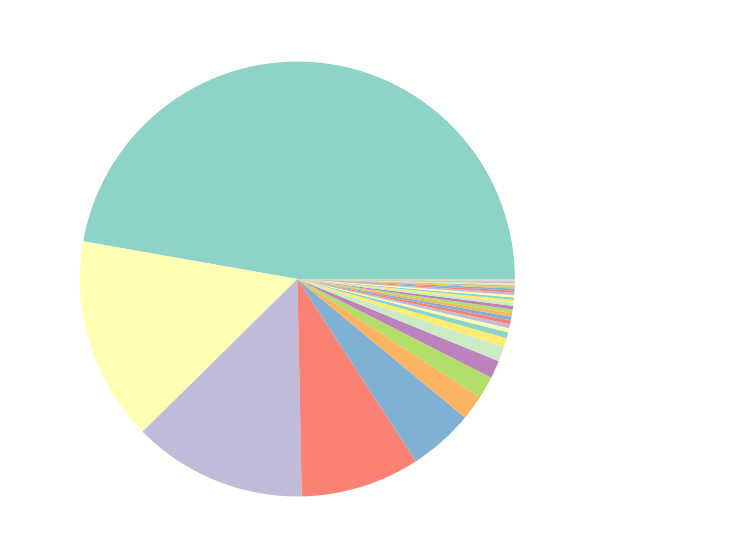

In [9]:
# Before clean up
data.Weather_Condition.value_counts().plot(kind='pie',figsize=(10,10))

In [10]:
# Sort values into general weather categories
data.loc[data.Weather_Condition.str.contains('Clear'),'Weather_Condition'] = 'Fair'
data.loc[data.Weather_Condition.str.contains('Sleet'),'Weather_Condition'] = 'Hail'
data.loc[data.Weather_Condition.str.contains('Ice Pellets'),'Weather_Condition'] = 'Hail'
data.loc[data.Weather_Condition.str.contains('Sand'),'Weather_Condition'] = 'Dusty'
data.loc[data.Weather_Condition.str.contains('Dust'),'Weather_Condition'] = 'Dusty'
data.loc[data.Weather_Condition.str.contains('Drizzle'),'Weather_Condition'] = 'Rain'
data.loc[data.Weather_Condition.str.contains('T-Storm'),'Weather_Condition'] = 'Thunderstorms'
data.loc[data.Weather_Condition.str.contains('Thunder'),'Weather_Condition'] = 'Thunderstorms'
data.loc[data.Weather_Condition.str.contains('Fog'),'Weather_Condition'] = 'Fog'
data.loc[data.Weather_Condition.str.contains('Cloud'),'Weather_Condition'] = 'Cloudy'
data.loc[data.Weather_Condition.str.contains('Rain'),'Weather_Condition'] = 'Rain'
data.loc[data.Weather_Condition.str.contains('Snow'),'Weather_Condition'] = 'Snow'
data.loc[data.Weather_Condition.str.contains('Windy'),'Weather_Condition'] = 'Windy'

<AxesSubplot:ylabel='Weather_Condition'>

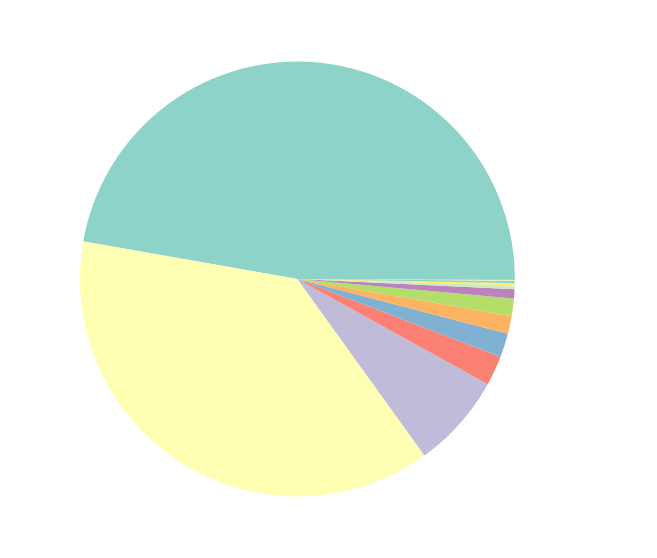

In [11]:
# After clean up
data.Weather_Condition.value_counts().plot(kind='pie',figsize=(10,10))

Second round of clean up.

In [12]:
# Another round of cleaning up this feature
data=data[(data.Weather_Condition == 'Fair') | (data.Weather_Condition == 'Mostly Cloudy') | (data.Weather_Condition == 'Cloudy') | (data.Weather_Condition == 'Partly Cloudy') | (data.Weather_Condition == 'Clear') | 
(data.Weather_Condition == 'Light Rain') | (data.Weather_Condition == 'Overcast') | (data.Weather_Condition == 'Scattered Clouds') | (data.Weather_Condition == 'Light Snow') | (data.Weather_Condition == 'Fog') | 
(data.Weather_Condition == 'Haze') | (data.Weather_Condition == 'Rain') | (data.Weather_Condition == 'Fair/Windy')]

<AxesSubplot:ylabel='Weather_Condition'>

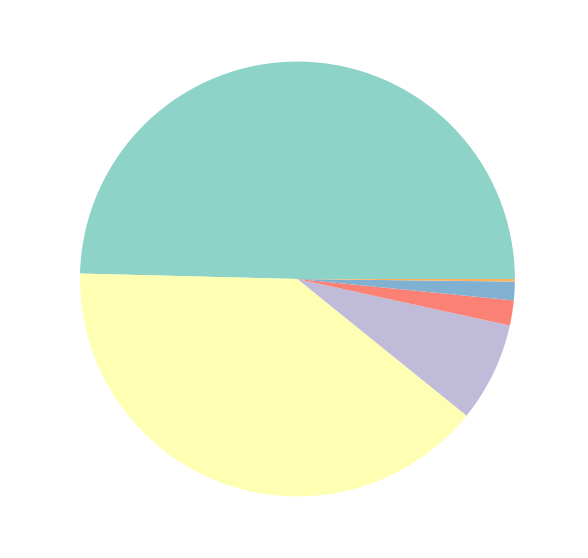

In [13]:
data.Weather_Condition.value_counts().plot(kind='pie',figsize=(10,10))

Print statistic data for each arithmetic feature.

In [14]:
data.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06,2.101929e+06
mean,2.072569e+00,3.587314e+01,-9.672859e+01,3.587328e+01,-9.672832e+01,6.776976e-01,6.255000e+01,6.162088e+01,6.416557e+01,2.940105e+01,9.231672e+00,6.926737e+00,4.366104e-03
std,3.795681e-01,5.393932e+00,1.834432e+01,5.394036e+00,1.834408e+01,1.438928e+00,1.779366e+01,1.941785e+01,2.261024e+01,1.046924e+00,2.366669e+00,5.190876e+00,4.919809e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-3.300000e+01,-5.010000e+01,1.000000e+00,1.672000e+01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.292400e+01,-1.180044e+02,3.292392e+01,-1.180037e+02,4.500000e-02,5.000000e+01,5.000000e+01,4.800000e+01,2.923000e+01,1.000000e+01,3.000000e+00,0.000000e+00
50%,2.000000e+00,3.539927e+01,-9.103596e+01,3.539954e+01,-9.103523e+01,2.040000e-01,6.400000e+01,6.400000e+01,6.600000e+01,2.975000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,3.991150e+01,-8.033532e+01,3.991000e+01,-8.033562e+01,7.660000e-01,7.600000e+01,7.600000e+01,8.300000e+01,2.997000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.748413e+01,4.907500e+01,-6.748413e+01,1.551860e+02,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.000000e+02,1.087000e+03,2.400000e+01


Statistic number of accidents per state.

<AxesSubplot:ylabel='State'>

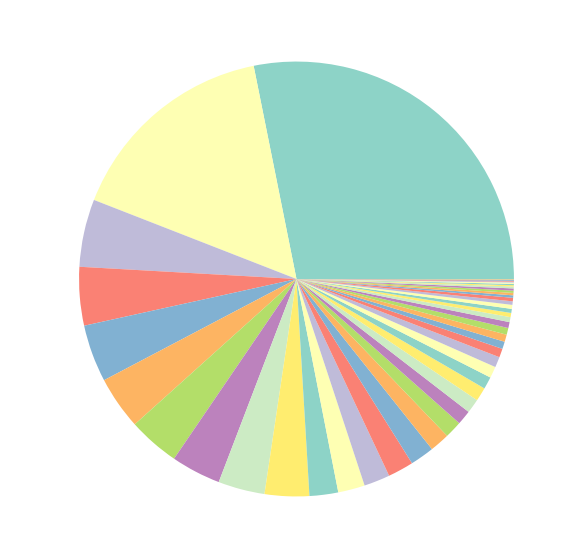

In [15]:
data.State.value_counts().plot(kind='pie', figsize=(10,10))

Statistic severity of accidents.

<AxesSubplot:ylabel='Severity'>

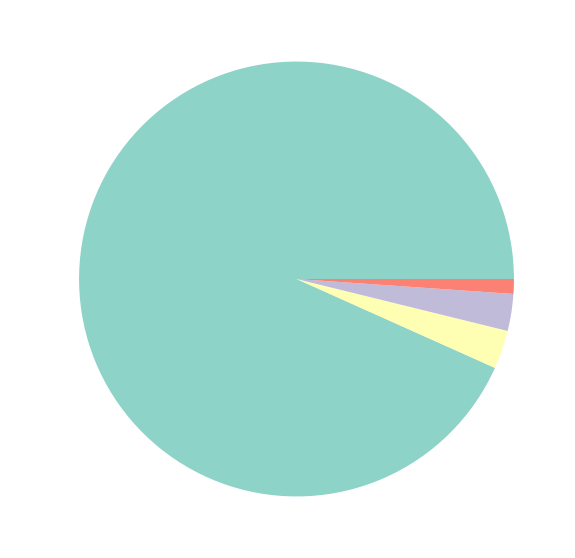

In [16]:
data.Severity.value_counts().plot(kind='pie',figsize=(10,10))

Accident's map given that longitute and langitute.

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

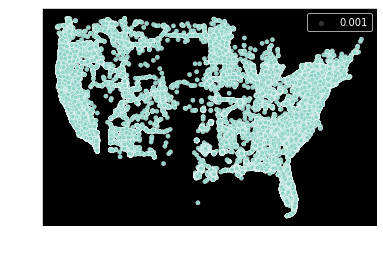

In [17]:
sample_df = data.sample(int(0.1 * len(data)))
sns.scatterplot(x=sample_df.Start_Lng, y=sample_df.Start_Lat, size=0.001)

Correlation.

In [18]:
data.corr()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,1.000000,0.084747,0.090828,0.084750,0.090831,0.059298,-0.029568,-0.032065,0.028896,-0.042994,...,0.006578,0.040396,-0.003868,-0.001697,-0.001107,-0.014516,-0.001634,-0.001878,-0.009910,NaN
Start_Lat,0.084747,1.000000,-0.180964,0.999996,-0.180960,0.075544,-0.462861,-0.468223,-0.024004,-0.290402,...,0.012208,0.061543,-0.018014,0.002342,-0.005555,-0.121633,0.012265,-0.002728,-0.055370,NaN
Start_Lng,0.090828,-0.180964,1.000000,-0.180961,0.999999,0.038353,0.058058,0.043426,0.162430,0.225997,...,0.016832,-0.026095,0.004699,-0.016933,0.001381,0.042311,-0.045541,-0.009500,0.059222,NaN
End_Lat,0.084750,0.999996,-0.180961,1.000000,-0.180957,0.075529,-0.462856,-0.468218,-0.024009,-0.290404,...,0.012194,0.061529,-0.018012,0.002342,-0.005555,-0.121631,0.012275,-0.002728,-0.055372,NaN
End_Lng,0.090831,-0.180960,0.999999,-0.180957,1.000000,0.038356,0.058062,0.043429,0.162425,0.225999,...,0.016831,-0.026090,0.004699,-0.016933,0.001381,0.042310,-0.045540,-0.009500,0.059219,NaN
Distance(mi),0.059298,0.075544,0.038353,0.075529,0.038356,1.000000,-0.037084,-0.040191,0.016258,-0.066651,...,-0.007292,0.031190,-0.011055,-0.023468,-0.002730,-0.058181,-0.032776,-0.008109,-0.112272,NaN
Temperature(F),-0.029568,-0.462861,0.058058,-0.462856,0.058062,-0.037084,1.000000,0.994450,-0.353158,0.144717,...,-0.008291,-0.034139,0.011813,0.002701,0.002509,0.069178,-0.001475,0.005673,0.041686,NaN
Wind_Chill(F),-0.032065,-0.468223,0.043426,-0.468218,0.043429,-0.040191,0.994450,1.000000,-0.336111,0.153995,...,-0.008460,-0.034099,0.011541,0.003403,0.002507,0.067878,-0.000523,0.005893,0.041212,NaN
Humidity(%),0.028896,-0.024004,0.162430,-0.024009,0.162425,0.016258,-0.353158,-0.336111,1.000000,0.187201,...,-0.000576,0.008684,-0.007910,0.000624,0.001009,0.000819,-0.015829,-0.006583,-0.032463,NaN
Pressure(in),-0.042994,-0.290402,0.225997,-0.290404,0.225999,-0.066651,0.144717,0.153995,0.187201,1.000000,...,-0.002578,0.021621,-0.001152,0.017527,0.001084,0.050820,-0.012817,0.000237,0.017394,NaN


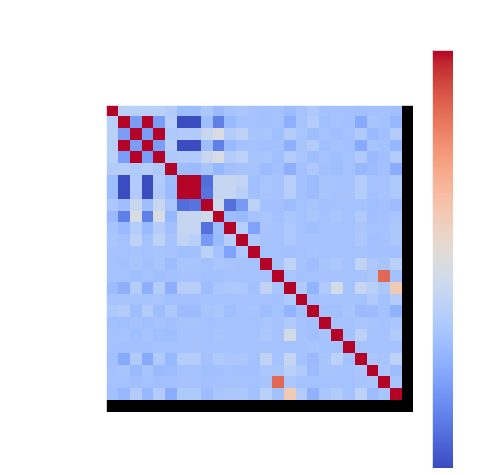

In [19]:

fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(data.corr(), cmap='coolwarm')

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90, ha='center')
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('corrmap.png', dpi=300)
plt.show()

Covariance.

In [20]:
data.cov()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
Severity,0.144072,0.173508,0.632425,0.173516,0.632439,0.032387,-0.199698,-0.236332,0.247991,-0.017085,...,1.229311e-04,4.227623e-03,-5.951074e-05,-5.822264e-05,-2.838624e-06,-8.958309e-04,-0.000086,-1.861905e-05,-0.001119,0.0
Start_Lat,0.173508,29.094501,-17.906050,29.094941,-17.905388,0.586332,-44.424350,-49.040974,-2.927446,-1.639912,...,3.241907e-03,9.152761e-02,-3.938906e-03,1.141847e-03,-2.024829e-04,-1.066723e-01,0.009203,-3.843086e-04,-0.088847,0.0
Start_Lng,0.632425,-17.906050,336.514002,-17.906064,336.509337,1.012382,18.950953,15.468511,67.370953,4.340297,...,1.520093e-02,-1.319849e-01,3.494150e-03,-2.807507e-02,1.712338e-04,1.261985e-01,-0.116216,-4.551846e-03,0.323177,0.0
End_Lat,0.173516,29.094941,-17.906064,29.095626,-17.905425,0.586228,-44.424736,-49.041479,-2.928178,-1.639956,...,3.238292e-03,9.150827e-02,-3.938606e-03,1.141564e-03,-2.024903e-04,-1.066729e-01,0.009211,-3.842957e-04,-0.088852,0.0
End_Lng,0.632439,-17.905388,336.509337,-17.905425,336.505147,1.012440,18.951780,15.469420,67.368143,4.340276,...,1.520067e-02,-1.319563e-01,3.494111e-03,-2.807474e-02,1.712229e-04,1.261941e-01,-0.116214,-4.551652e-03,0.323160,0.0
Distance(mi),0.032387,0.586332,1.012382,0.586228,1.012440,2.070513,-0.949483,-1.122969,0.528938,-0.100406,...,-5.165785e-04,1.237415e-02,-6.448583e-04,-3.052125e-03,-2.654371e-05,-1.361180e-02,-0.006561,-3.047688e-04,-0.048058,0.0
Temperature(F),-0.199698,-44.424350,18.950953,-44.424736,18.951780,-0.949483,316.614429,343.597011,-142.082079,2.695877,...,-7.263451e-03,-1.674874e-01,8.520796e-03,4.343655e-03,3.017230e-04,2.001384e-01,-0.003651,2.636603e-03,0.220656,0.0
Wind_Chill(F),-0.236332,-49.040974,15.468511,-49.041479,15.469420,-1.122969,343.597011,377.053068,-147.566908,3.130560,...,-8.087112e-03,-1.825608e-01,9.084831e-03,5.973055e-03,3.289340e-04,2.143005e-01,-0.001412,2.988799e-03,0.238060,0.0
Humidity(%),0.247991,-2.927446,67.370953,-2.928178,67.368143,0.528938,-142.082079,-147.566908,511.222944,4.431285,...,-6.411079e-04,5.413428e-02,-7.249949e-03,1.274305e-03,1.541943e-04,3.012002e-03,-0.049788,-3.887665e-03,-0.218348,0.0
Pressure(in),-0.017085,-1.639912,4.340297,-1.639956,4.340276,-0.100406,2.695877,3.130560,4.431285,1.096051,...,-1.328945e-04,6.241160e-03,-4.888906e-05,1.658492e-03,7.668659e-06,8.650658e-03,-0.001867,6.484434e-06,0.005417,0.0


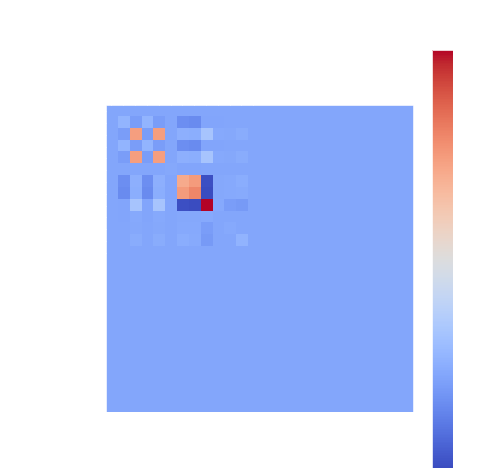

In [21]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
sm = ax.matshow(data.cov(), cmap='coolwarm')

plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, rotation=90, ha='center')
plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, )

plt.colorbar(sm)

plt.tight_layout()
plt.savefig('covmap.png', dpi=300)
plt.show()

Scaling & Normalization.

In [39]:
# Counting the numerical colmns in the dataset
numeric = ['int16','int32','int64','float16','float32','float64']
numeric_columns = data.select_dtypes(include=numeric)
numeric_columns.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,42.1,36.1,58.0,29.76,10.0,10.4,0.00
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,37.0,29.8,93.0,29.69,10.0,10.4,0.01
56,2,38.178100,-85.719460,38.181040,-85.721160,0.223,17.1,5.8,68.0,30.12,10.0,9.2,0.00
57,2,38.185770,-85.806780,38.206480,-85.827850,1.832,17.1,5.8,68.0,30.12,10.0,9.2,0.00
58,3,38.271910,-85.808380,38.271910,-85.808380,0.000,17.1,5.8,68.0,30.12,10.0,9.2,0.00


In [49]:
# Initialize a minmax scaler 
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

# Scale the dataframe
df_scaled = scaler.fit_transform(numeric_columns.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'])
df_scaled.head()


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,0.666667,0.636103,0.726469,0.634300,0.727527,0.020814,0.327948,0.350264,0.575758,0.309151,0.10,0.009568,0.000000
1,0.666667,0.597775,0.701937,0.595882,0.701767,0.003222,0.305677,0.324665,0.929293,0.307492,0.10,0.009568,0.000417
2,0.333333,0.557083,0.680440,0.555512,0.680398,0.001437,0.218777,0.227143,0.676768,0.317686,0.10,0.008464,0.000000
3,0.333333,0.557397,0.678910,0.556550,0.678528,0.011805,0.218777,0.227143,0.676768,0.317686,0.10,0.008464,0.000000
4,0.666667,0.560922,0.678882,0.559219,0.678869,0.000000,0.218777,0.227143,0.676768,0.317686,0.10,0.008464,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101924,0.333333,0.386193,0.125626,0.384874,0.125738,0.003499,0.519651,0.553027,0.393939,0.289237,0.10,0.011960,0.000000
2101925,0.333333,0.335629,0.129679,0.334552,0.129546,0.002178,0.449782,0.488013,0.727273,0.300379,0.10,0.005520,0.000000
2101926,0.333333,0.376902,0.117417,0.375837,0.117215,0.003615,0.462882,0.500203,0.636364,0.308677,0.10,0.009200,0.000000
2101927,0.333333,0.385783,0.107687,0.384230,0.107780,0.004975,0.454148,0.492076,0.808081,0.305832,0.10,0.007360,0.000000
